<a href="https://colab.research.google.com/github/YuvrajRawat/Comparative-Analysis-of-Classification-Algorithms-on-MNIST-Dataset/blob/main/Comparative_Analysis_of_Classification_Algorithms_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

In [5]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9700714285714286


In [6]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9351428571428572


In [7]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9675


In [8]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=30, random_state=42)

# Train and evaluate model over multiple epochs
epochs = np.arange(1, 31)
accuracies = []

In [9]:
for epoch in epochs:
    mlp.max_iter = epoch
    mlp.fit(X_train, y_train)
    pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

In [11]:
final_accuracy = accuracies[-1]
print(f"Final Accuracy: {final_accuracy:.4f}")

Final Accuracy: 0.9775


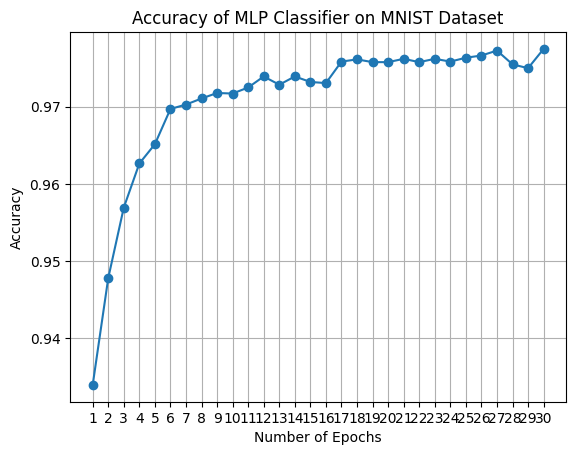

In [12]:
import matplotlib.pyplot as plt

# Create a line graph
plt.plot(epochs, accuracies, marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of MLP Classifier on MNIST Dataset')
plt.xticks(epochs)
plt.grid(True)
plt.show()

In [13]:
models = [knn, svm, rf, mlp]
model_names = ['KNN', 'SVM', 'Random Forest', 'MLP']
accuracies = []

In [14]:
# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


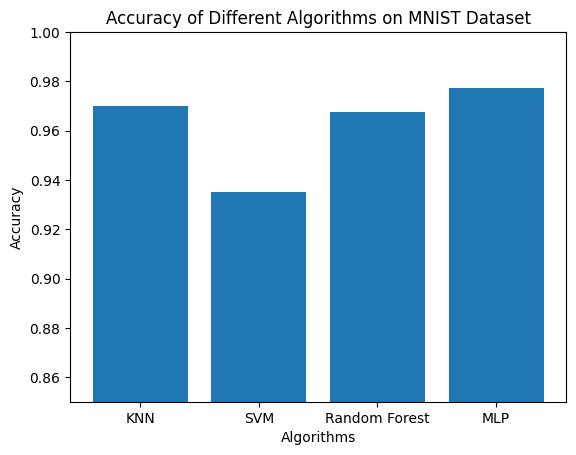

In [15]:
# Create a bar graph
plt.bar(model_names, accuracies)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms on MNIST Dataset')
plt.ylim(0.85, 1.0)  # Adjust the y-axis limits
plt.show()